一.读取数据

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
df = pd.read_csv('movie_metadata.csv') 
#usecols 按列读取内容  0-(len-1)
# df = pd.read_csv('movie_metadata.csv',usecols=[0,1,2,3,4,5]) 
df 

,movie_title,language,country,content_rating,title_year,color,duration,genres,plot_keywords,budget,...,actor_2_facebook_likes,actor_3_name,actor_3_facebook_likes,num_voted_users,num_user_for_reviews,num_critic_for_reviews,movie_facebook_likes,cast_total_facebook_likes,movie_imdb_link,imdb_score
0,Avatar,English,USA,PG-13,2009-02,Color,178.0,Action|Adventure|Fantasy|Sci-Fi,avatar|future|marine|native|paraplegic,237000000.0,...,936.0,Wes Studi,855.0,886204,3054.0,723.0,33000,4834,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,7.9
1,Pirates of the Caribbean: At World's End,English,USA,PG-13,2007-09,Color,169.0,Action|Adventure|Fantasy,goddess|marriage ceremony|marriage proposal|pi...,300000000.0,...,5000.0,Jack Davenport,1000.0,471220,1238.0,302.0,0,48350,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,7.1
2,Spectre,English,UK,PG-13,2015-11,Color,148.0,Action|Adventure|Thriller,bomb|espionage|sequel|spy|terrorist,245000000.0,...,393.0,Stephanie Sigman,161.0,275868,994.0,602.0,85000,11700,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,6.8
3,The Dark Knight Rises,English,USA,PG-13,2012-08,Color,164.0,Action|Thriller,deception|imprisonment|lawlessness|police offi...,250000000.0,...,23000.0,Joseph Gordon-Levitt,23000.0,1144337,2701.0,813.0,164000,106759,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,8.5
4,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,NaN,NaN,NaN,NaN,Documentary,NaN,NaN,...,12.0,NaN,NaN,8,NaN,NaN,0,143,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,7.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Signed Sealed Delivered,English,Canada,NaN,2013-06,Color,87.0,Comedy|Drama,fraud|postal worker|prison|theft|trial,NaN,...,470.0,Crystal Lowe,318.0,629,6.0,1.0,84,2283,http://www.imdb.com/title/tt3000844/?ref_=fn_t...,7.7
5039,The Following,English,USA,TV-14,NaN,Color,43.0,Crime|Drama|Mystery|Thriller,cult|fbi|hideout|prison escape|serial killer,NaN,...,593.0,Sam Underwood,319.0,73839,359.0,43.0,32000,1753,http://www.imdb.com/title/tt2071645/?ref_=fn_t...,7.5
5040,A Plague So Pleasant,English,USA,NaN,2013-09,Color,76.0,Drama|Horror|Thriller,NaN,1400.0,...,0.0,David Chandler,0.0,38,3.0,13.0,16,0,http://www.imdb.com/title/tt2107644/?ref_=fn_t...,6.3
5041,Shanghai Calling,English,USA,PG-13,2012-11,Color,100.0,Comedy|Drama|Romance,NaN,NaN,...,719.0,Eliza Coupe,489.0,1255,9.0,14.0,660,2386,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,6.3


二.清洗数据

1.概览数据

In [2]:
# df.shape #(5043, 28) 行列  
# df.count()  #查看各个列非空数据的数据量   
# df.isna().sum()  #查看nan个数 
# df.describe() #整个数据描述 ,只统计数字类型的数据
# df.info() #数据信息 
df.head() 

,movie_title,language,country,content_rating,title_year,color,duration,genres,plot_keywords,budget,...,actor_2_facebook_likes,actor_3_name,actor_3_facebook_likes,num_voted_users,num_user_for_reviews,num_critic_for_reviews,movie_facebook_likes,cast_total_facebook_likes,movie_imdb_link,imdb_score
0,Avatar,English,USA,PG-13,2009-02,Color,178.0,Action|Adventure|Fantasy|Sci-Fi,avatar|future|marine|native|paraplegic,237000000.0,...,936.0,Wes Studi,855.0,886204,3054.0,723.0,33000,4834,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,7.9
1,Pirates of the Caribbean: At World's End,English,USA,PG-13,2007-09,Color,169.0,Action|Adventure|Fantasy,goddess|marriage ceremony|marriage proposal|pi...,300000000.0,...,5000.0,Jack Davenport,1000.0,471220,1238.0,302.0,0,48350,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,7.1
2,Spectre,English,UK,PG-13,2015-11,Color,148.0,Action|Adventure|Thriller,bomb|espionage|sequel|spy|terrorist,245000000.0,...,393.0,Stephanie Sigman,161.0,275868,994.0,602.0,85000,11700,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,6.8
3,The Dark Knight Rises,English,USA,PG-13,2012-08,Color,164.0,Action|Thriller,deception|imprisonment|lawlessness|police offi...,250000000.0,...,23000.0,Joseph Gordon-Levitt,23000.0,1144337,2701.0,813.0,164000,106759,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,8.5
4,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,NaN,NaN,NaN,NaN,Documentary,NaN,NaN,...,12.0,NaN,NaN,8,NaN,NaN,0,143,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,7.1


2.清洗

In [3]:
data = df.dropna(how='any') 
data # (3761 rows × 28 columns)

,movie_title,language,country,content_rating,title_year,color,duration,genres,plot_keywords,budget,...,actor_2_facebook_likes,actor_3_name,actor_3_facebook_likes,num_voted_users,num_user_for_reviews,num_critic_for_reviews,movie_facebook_likes,cast_total_facebook_likes,movie_imdb_link,imdb_score
0,Avatar,English,USA,PG-13,2009-02,Color,178.0,Action|Adventure|Fantasy|Sci-Fi,avatar|future|marine|native|paraplegic,237000000.0,...,936.0,Wes Studi,855.0,886204,3054.0,723.0,33000,4834,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,7.9
1,Pirates of the Caribbean: At World's End,English,USA,PG-13,2007-09,Color,169.0,Action|Adventure|Fantasy,goddess|marriage ceremony|marriage proposal|pi...,300000000.0,...,5000.0,Jack Davenport,1000.0,471220,1238.0,302.0,0,48350,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,7.1
2,Spectre,English,UK,PG-13,2015-11,Color,148.0,Action|Adventure|Thriller,bomb|espionage|sequel|spy|terrorist,245000000.0,...,393.0,Stephanie Sigman,161.0,275868,994.0,602.0,85000,11700,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,6.8
3,The Dark Knight Rises,English,USA,PG-13,2012-08,Color,164.0,Action|Thriller,deception|imprisonment|lawlessness|police offi...,250000000.0,...,23000.0,Joseph Gordon-Levitt,23000.0,1144337,2701.0,813.0,164000,106759,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,8.5
5,John Carter,English,USA,PG-13,2012-07,Color,132.0,Action|Adventure|Sci-Fi,alien|american civil war|male nipple|mars|prin...,263700000.0,...,632.0,Polly Walker,530.0,212204,738.0,462.0,24000,1873,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,6.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5026,Clean,French,France,R,2004-01,Color,110.0,Drama|Music|Romance,jail|junkie|money|motel|singer,4500.0,...,133.0,Don McKellar,45.0,3924,39.0,81.0,171,776,http://www.imdb.com/title/tt0388838/?ref_=fn_t...,6.9
5027,The Circle,Persian,Iran,Not Rated,2000-05,Color,90.0,Drama,abortion|bus|hospital|prison|prostitution,10000.0,...,0.0,Mojgan Faramarzi,0.0,4555,26.0,64.0,697,5,http://www.imdb.com/title/tt0255094/?ref_=fn_t...,7.5
5033,Primer,English,USA,PG-13,2004-10,Color,77.0,Drama|Sci-Fi|Thriller,changing the future|independent film|invention...,7000.0,...,45.0,Casey Gooden,8.0,72639,371.0,143.0,19000,368,http://www.imdb.com/title/tt0390384/?ref_=fn_t...,7.0
5035,El Mariachi,Spanish,USA,R,1992-03,Color,81.0,Action|Crime|Drama|Romance|Thriller,assassin|death|guitar|gun|mariachi,7000.0,...,20.0,Consuelo Gómez,6.0,52055,130.0,56.0,0,147,http://www.imdb.com/title/tt0104815/?ref_=fn_t...,6.9


三.分析数据

1.电影发展趋势 

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


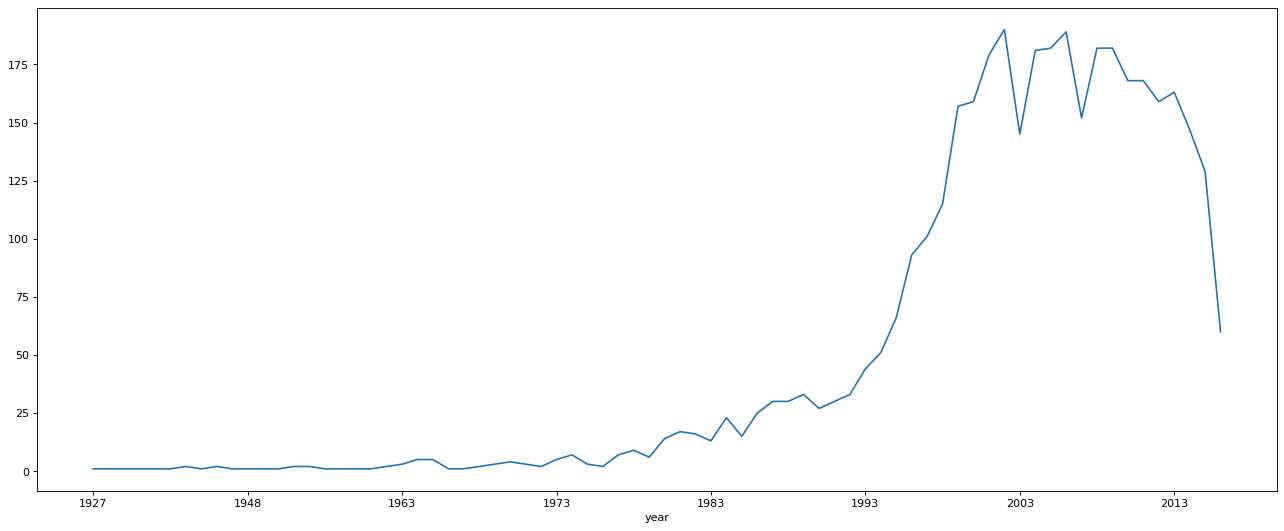

In [4]:
#历年来电影数量走势 (按照年进行统计 )
#历年来 电影数量
#lamdba表达式 
# =函数  
# def func(x):
#     return x*x 
# #func = lambda x: x*x
# #lambda(参数:返回值 )
#  data['title_year'].apply(lambda x: x*x)
data['year'] = data['title_year'].apply(lambda x:x[:4]) 

data['month'] = data['title_year'].apply(lambda x:x[5:]) 

data 

#每年电影数量走势(折线), 统计, 每年电影数量 
movie_years_count = data.groupby('year')['movie_title'].count() 
movie_years_count 
plt.figure(figsize=(20,8),dpi=80)
# plot() pandas 绘图方法  
movie_years_count.plot()
plt.show()

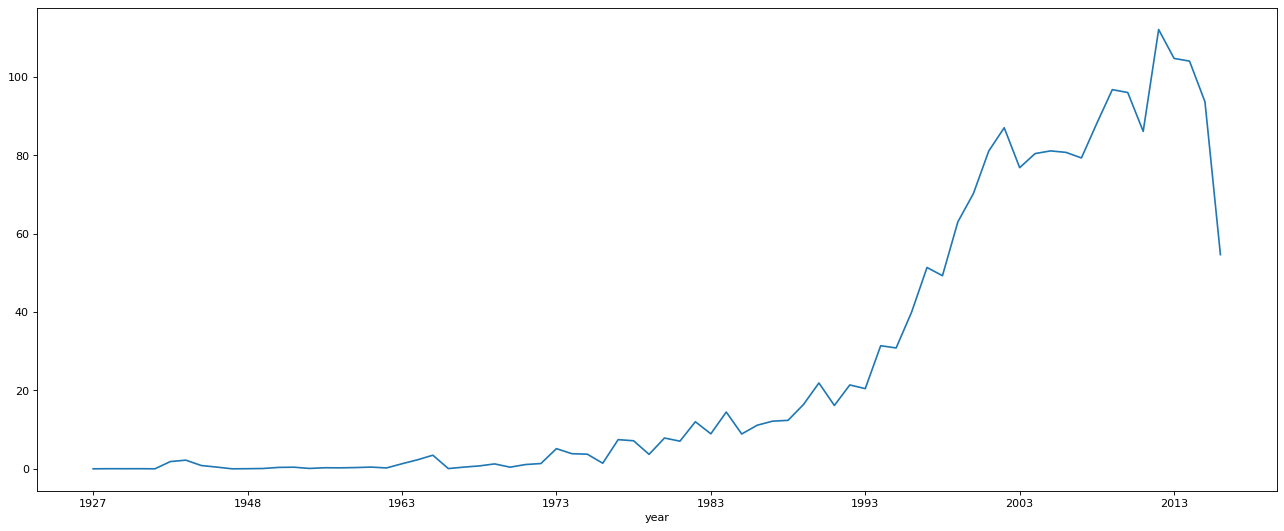

In [5]:
#历年来电影票房走势
movie_years_gross = data.groupby('year')['gross'].sum()/10000/10000
plt.figure(figsize=(20,8),dpi=80)
movie_years_gross.plot()
plt.savefig('movie_years_gross.png')
plt.show()

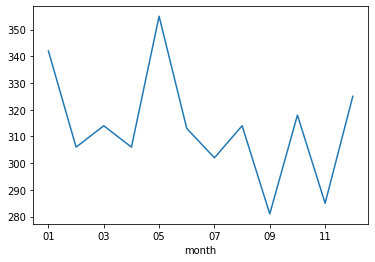

In [6]:
#月份电影数量走势 
movie_month_count = data.groupby('month')['movie_title'].count()
plt.figure()
movie_month_count.plot()
plt.savefig('movie_month_count.png')
plt.show()

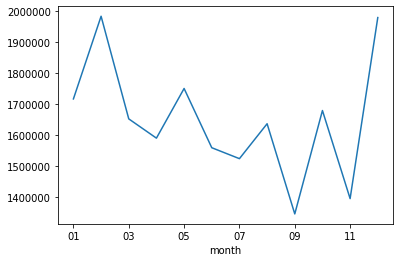

In [7]:
#月份票房走势 
movie_month_gross = data.groupby('month')['gross'].sum()/10000
plt.figure()
movie_month_gross.plot()
plt.savefig('movie_years_gross.png')
plt.show()

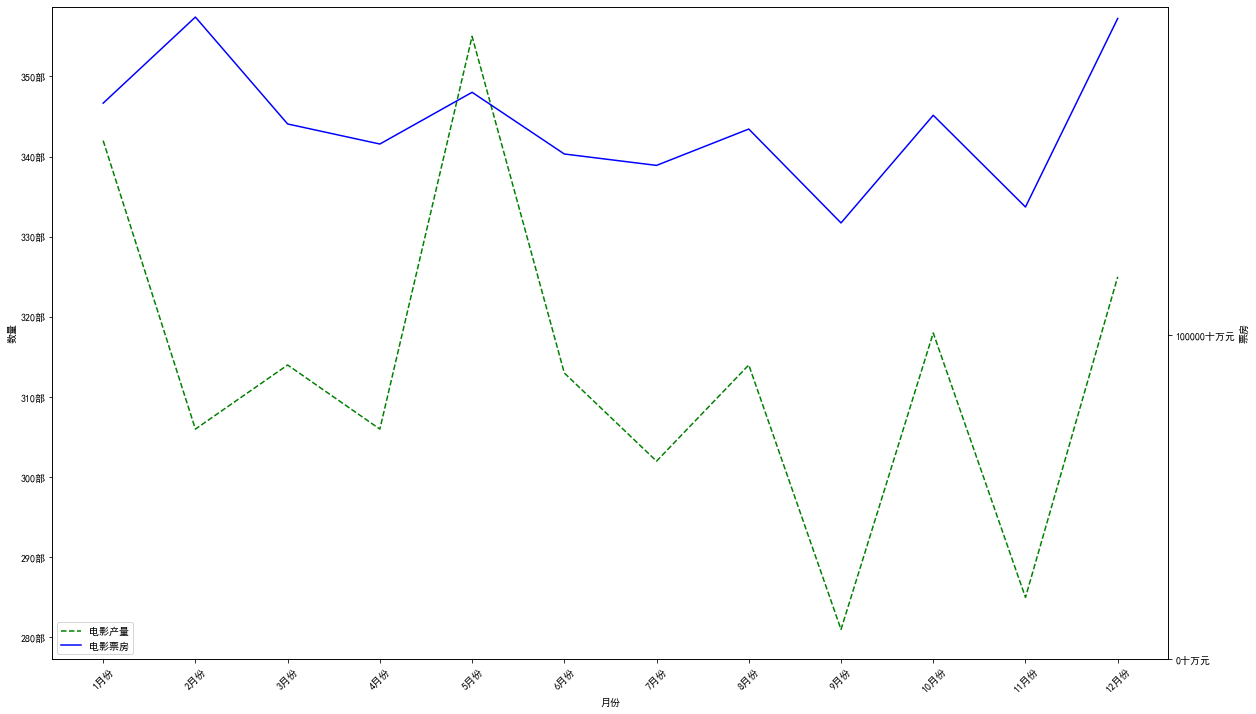

In [8]:
#拓展:
#电影产量与票房放在一个图中 
#设置字体 
plt.rcParams['font.sans-serif'] = 'SimHei' 
#设置子图  
fig,ax1 = plt.subplots(figsize=(20,12)) 
#一.电影数量搞定 
movie_month_count = data.groupby('month')['movie_title'].count() 
#1.1横坐标转成整数 
x = movie_month_count.index.astype('int')
x 
#1.2纵轴坐标 
y1 = movie_month_count.values.astype('int')
y1 
#1.3x轴刻度 
x_ticks_label = ["{}月份".format(i) for i in x ]
ax1.set_xticks(x) 
ax1.set_xticklabels(x_ticks_label,rotation = 45) 
#1.4y轴刻度 
y1_ticks = np.arange(0,max(y1),10) 
y1_ticks_label = ["{}部".format(i) for i in y1_ticks]
ax1.set_yticks(y1_ticks) 
ax1.set_yticklabels(y1_ticks_label) 
#1.5绘制 
ax1.plot(x,y1,'--',label="电影产量",color="g") 
ax1.set_xlabel("月份")
ax1.set_ylabel("数量")

#2.电影票房
#共用x轴  twiny 共享y 
ax2 = ax1.twinx() 
movie_month_gross = data.groupby('month')['gross'].sum()/100000
y2 = movie_month_gross.values.astype("int")
ax2.plot(x,y2,'-',label="电影票房",color='b')
y2_ticks = np.arange(0,max(y2),100000)
y2_ticks_label =  ["{}十万元".format(i) for i in y2_ticks] 
ax2.set_yticks(y2_ticks) 
ax2.set_yticklabels(y2_ticks_label) 
#图例 
handles1,labels1 = ax1.get_legend_handles_labels() 
handles2,labels2 = ax2.get_legend_handles_labels()
plt.legend(handles1+handles2, labels1+labels2,loc="lower left")
ax2.set_ylabel("票房")
plt.show() 

In [9]:
#各国家电影数量 
country_years_count = data.groupby('country')['movie_title'].count()
country_years_count.sort_values(ascending=False)

country
USA               2992
UK                 318
France             101
Germany             80
Canada              59
Australia           39
Spain               21
Japan               15
China               13
Hong Kong           13
Italy               11
New Zealand         11
Denmark              8
South Korea          8
Ireland              7
Mexico               6
India                5
Brazil               5
Norway               4
Thailand             4
Iran                 4
Netherlands          3
Argentina            3
Russia               3
South Africa         3
Czech Republic       3
Hungary              2
Romania              2
Taiwan               2
Belgium              1
Aruba                1
Chile                1
Colombia             1
West Germany         1
Finland              1
Georgia              1
Greece               1
Iceland              1
Indonesia            1
Israel               1
New Line             1
Official site        1
Peru                 1
Pol

2.电影情况分析

电影时长分布 

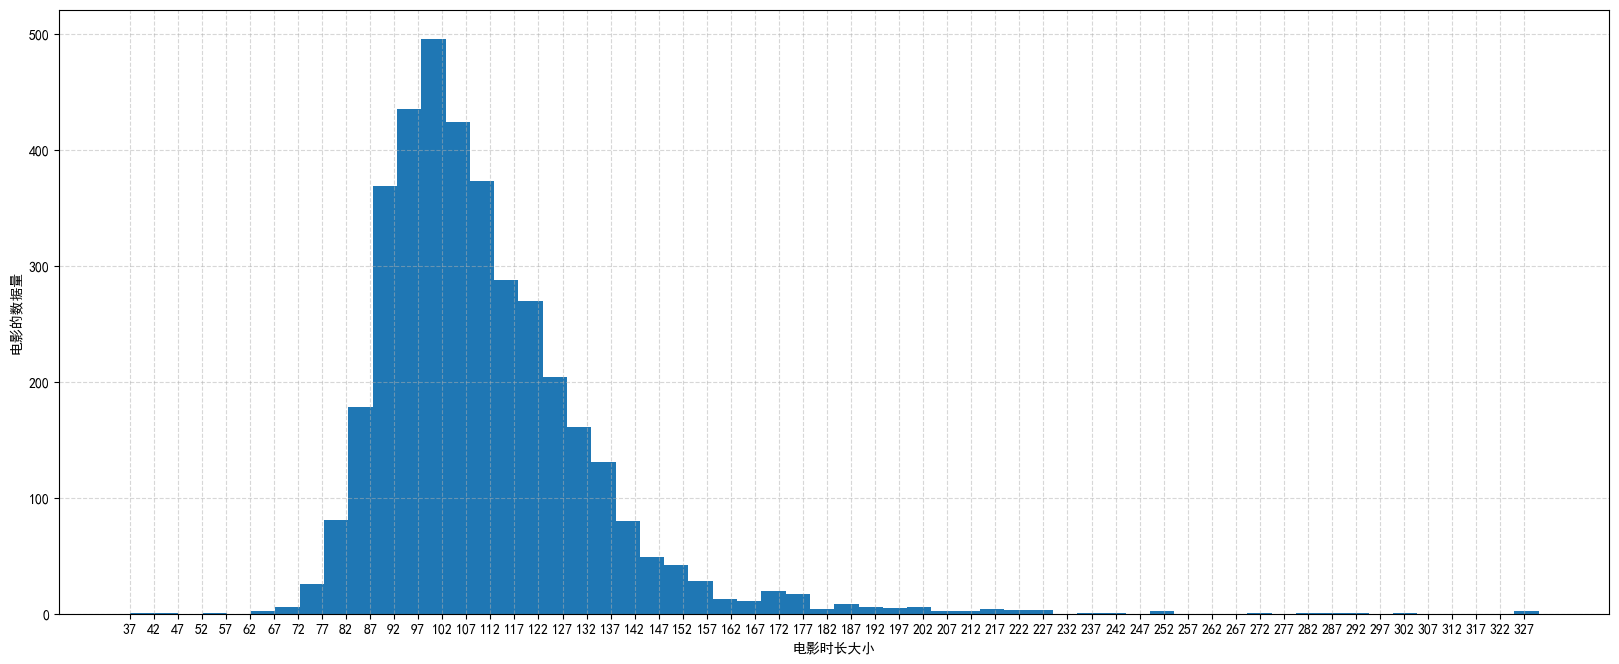

In [10]:
# 电影时长分布 
movie_duration = data.duration 
movie_duration  

# 2）创建画布
plt.figure(figsize=(20, 8), dpi=100)

# 3）绘制直方图
# 设置组距
distance = 5
# 计算组数
group_num = int((max(movie_duration ) - min(movie_duration )) / distance)
# 绘制直方图
# time X轴坐标, bins就是组值也就是标签
plt.hist(movie_duration , bins=group_num)

# print(int(min(movie_duration)))
# print(int(max(movie_duration)))
# 修改x轴刻度显示
# plt.xticks(range(37,330)[::5])
plt.xticks(range(int(min(movie_duration)),int(max(movie_duration)))[::5])
# 添加网格显示
plt.grid(linestyle="--", alpha=0.5)

# 添加x, y轴描述信息
plt.xlabel("电影时长大小")
plt.ylabel("电影的数据量")

# 4）显示图像
plt.show()

In [12]:
# 构建一个新的dataframe 类别\票房 
# 处理类别, 方法. 
# 构建一个新的dataframe，只需要类别和票房这两个特征
genre_data = pd.DataFrame(columns = ['genre','gross']) 
# data.iterrows:使用迭代器的方式读取数据，返回数字索引(int)和每一行的数据(series)
# (元组 i , row_data )
for i, row_data in data.iterrows():
    # 使用split将genres分割
    genres = row_data['genres'].split('|')
    n_genres = len(genres)
    # 构建一个空字典，用以保存genre和gross的值
    dict_obj = {}
    dict_obj['gross'] = [row_data['gross']] * n_genres
    print(dict_obj['gross'])
    
    dict_obj['genre'] = genres
    # 将字典转为dataframe类型
    genre_df = pd.DataFrame(dict_obj)
    # DataFrame的append将genre_df的数据添加进genre_data
    genre_data = genre_data.append(genre_df)
# 将最终的数据写入csv保存
genre_data.to_csv('genre_data.csv',index=None)

[760505847.0, 760505847.0, 760505847.0, 760505847.0]
[309404152.0, 309404152.0, 309404152.0]
[200074175.0, 200074175.0, 200074175.0]
[448130642.0, 448130642.0]
[73058679.0, 73058679.0, 73058679.0]
[336530303.0, 336530303.0, 336530303.0]
[200807262.0, 200807262.0, 200807262.0, 200807262.0, 200807262.0, 200807262.0, 200807262.0]
[458991599.0, 458991599.0, 458991599.0]
[301956980.0, 301956980.0, 301956980.0, 301956980.0]
[330249062.0, 330249062.0, 330249062.0]
[200069408.0, 200069408.0, 200069408.0]
[168368427.0, 168368427.0]
[423032628.0, 423032628.0, 423032628.0]
[89289910.0, 89289910.0, 89289910.0]
[291021565.0, 291021565.0, 291021565.0, 291021565.0]
[141614023.0, 141614023.0, 141614023.0, 141614023.0]
[623279547.0, 623279547.0, 623279547.0]
[241063875.0, 241063875.0, 241063875.0]
[179020854.0, 179020854.0, 179020854.0, 179020854.0, 179020854.0, 179020854.0]
[255108370.0, 255108370.0]
[262030663.0, 262030663.0, 262030663.0]
[105219735.0, 105219735.0, 105219735.0, 105219735.0]
[25835535

[249358727.0, 249358727.0, 249358727.0, 249358727.0]
[49551662.0, 49551662.0, 49551662.0, 49551662.0]
[60522097.0, 60522097.0, 60522097.0]
[137748063.0, 137748063.0, 137748063.0, 137748063.0]
[113733726.0, 113733726.0, 113733726.0, 113733726.0]
[148337537.0, 148337537.0, 148337537.0, 148337537.0, 148337537.0]
[317557891.0, 317557891.0, 317557891.0]
[33592415.0, 33592415.0, 33592415.0]
[305388685.0, 305388685.0, 305388685.0]
[337103873.0, 337103873.0, 337103873.0]
[217536138.0, 217536138.0]
[131536019.0, 131536019.0, 131536019.0, 131536019.0, 131536019.0]
[214948780.0, 214948780.0, 214948780.0, 214948780.0, 214948780.0]
[209805005.0, 209805005.0, 209805005.0]
[186830669.0, 186830669.0, 186830669.0, 186830669.0, 186830669.0]
[163192114.0, 163192114.0, 163192114.0]
[119412921.0, 119412921.0]
[32694788.0, 32694788.0, 32694788.0]
[113165635.0, 113165635.0, 113165635.0]
[107285004.0]
[260031035.0, 260031035.0, 260031035.0]
[186739919.0, 186739919.0, 186739919.0, 186739919.0]
[215397307.0, 21

[60874615.0, 60874615.0, 60874615.0]
[143618384.0, 143618384.0, 143618384.0, 143618384.0, 143618384.0]
[58220776.0, 58220776.0, 58220776.0]
[47474112.0, 47474112.0, 47474112.0, 47474112.0]
[42877165.0, 42877165.0, 42877165.0, 42877165.0]
[35168677.0, 35168677.0, 35168677.0, 35168677.0]
[56114221.0, 56114221.0, 56114221.0]
[37567440.0, 37567440.0]
[61644321.0, 61644321.0, 61644321.0]
[190562.0, 190562.0, 190562.0, 190562.0]
[120147445.0, 120147445.0, 120147445.0]
[241688385.0, 241688385.0, 241688385.0, 241688385.0]
[144512310.0, 144512310.0, 144512310.0]
[233630478.0, 233630478.0, 233630478.0]
[197992827.0, 197992827.0, 197992827.0, 197992827.0, 197992827.0]
[176049130.0, 176049130.0, 176049130.0]
[172620724.0, 172620724.0, 172620724.0, 172620724.0]
[183405771.0, 183405771.0]
[20315324.0, 20315324.0, 20315324.0]
[148313048.0, 148313048.0, 148313048.0, 148313048.0]
[127706877.0, 127706877.0, 127706877.0, 127706877.0, 127706877.0, 127706877.0]
[126149655.0, 126149655.0, 126149655.0, 12614

[115731542.0, 115731542.0, 115731542.0]
[100468793.0]
[93771072.0, 93771072.0, 93771072.0, 93771072.0, 93771072.0, 93771072.0]
[100448498.0, 100448498.0]
[115603980.0, 115603980.0, 115603980.0, 115603980.0]
[90454043.0, 90454043.0, 90454043.0]
[84049211.0, 84049211.0, 84049211.0]
[70450000.0, 70450000.0, 70450000.0]
[69688384.0, 69688384.0, 69688384.0]
[70236496.0, 70236496.0, 70236496.0]
[63695760.0]
[59617068.0, 59617068.0]
[55637680.0, 55637680.0, 55637680.0]
[85911262.0, 85911262.0, 85911262.0, 85911262.0]
[53846915.0, 53846915.0, 53846915.0, 53846915.0]
[54758461.0, 54758461.0, 54758461.0]
[52397389.0, 52397389.0, 52397389.0, 52397389.0, 52397389.0, 52397389.0]
[38966057.0, 38966057.0]
[42345531.0, 42345531.0, 42345531.0, 42345531.0]
[36064910.0, 36064910.0, 36064910.0]
[33328051.0, 33328051.0, 33328051.0, 33328051.0, 33328051.0]
[32598931.0, 32598931.0, 32598931.0]
[28045540.0, 28045540.0, 28045540.0, 28045540.0, 28045540.0, 28045540.0]
[37023395.0]
[43532294.0, 43532294.0]
[1721

[165500000.0, 165500000.0, 165500000.0, 165500000.0]
[153620822.0, 153620822.0, 153620822.0, 153620822.0]
[218628680.0, 218628680.0]
[147637474.0, 147637474.0, 147637474.0]
[135014968.0, 135014968.0, 135014968.0, 135014968.0]
[2175312.0]
[126203320.0, 126203320.0]
[126975169.0, 126975169.0, 126975169.0]
[125548685.0, 125548685.0]
[105807520.0, 105807520.0]
[191616238.0, 191616238.0, 191616238.0]
[105264608.0, 105264608.0, 105264608.0]
[97680195.0, 97680195.0]
[126088877.0, 126088877.0, 126088877.0]
[91030827.0, 91030827.0]
[150315155.0, 150315155.0]
[127997349.0, 127997349.0, 127997349.0, 127997349.0, 127997349.0]
[88504640.0, 88504640.0, 88504640.0, 88504640.0]
[81517441.0, 81517441.0, 81517441.0, 81517441.0]
[81022333.0, 81022333.0, 81022333.0, 81022333.0]
[79948113.0, 79948113.0, 79948113.0, 79948113.0]
[88658172.0, 88658172.0]
[84244877.0, 84244877.0, 84244877.0]
[75367693.0, 75367693.0, 75367693.0, 75367693.0]
[73701902.0, 73701902.0]
[75605492.0, 75605492.0, 75605492.0]
[67823573

[82522790.0, 82522790.0, 82522790.0]
[94125426.0, 94125426.0, 94125426.0]
[95001343.0, 95001343.0, 95001343.0]
[81292135.0, 81292135.0, 81292135.0]
[86208010.0]
[81593527.0, 81593527.0, 81593527.0]
[75274748.0, 75274748.0]
[90835030.0, 90835030.0]
[72455275.0, 72455275.0, 72455275.0, 72455275.0, 72455275.0]
[75305995.0, 75305995.0, 75305995.0]
[74098862.0, 74098862.0]
[72266306.0, 72266306.0, 72266306.0, 72266306.0]
[71347010.0, 71347010.0]
[70836296.0, 70836296.0, 70836296.0, 70836296.0]
[70405498.0, 70405498.0, 70405498.0]
[70163652.0, 70163652.0]
[66808615.0, 66808615.0, 66808615.0, 66808615.0]
[115603980.0, 115603980.0, 115603980.0, 115603980.0]
[64149837.0, 64149837.0, 64149837.0, 64149837.0, 64149837.0]
[83906114.0, 83906114.0]
[66466372.0]
[72306065.0, 72306065.0, 72306065.0]
[59068786.0, 59068786.0, 59068786.0, 59068786.0]
[57887882.0, 57887882.0, 57887882.0]
[53955614.0, 53955614.0, 53955614.0, 53955614.0, 53955614.0]
[54967359.0, 54967359.0]
[54228104.0, 54228104.0, 54228104.

[22913677.0, 22913677.0, 22913677.0, 22913677.0]
[34531832.0, 34531832.0, 34531832.0]
[28064226.0, 28064226.0, 28064226.0]
[19447478.0, 19447478.0, 19447478.0, 19447478.0, 19447478.0]
[19389454.0, 19389454.0]
[25871834.0, 25871834.0, 25871834.0, 25871834.0]
[19692608.0, 19692608.0, 19692608.0]
[19294901.0, 19294901.0]
[20275446.0, 20275446.0, 20275446.0]
[34507079.0, 34507079.0, 34507079.0]
[18306166.0, 18306166.0, 18306166.0, 18306166.0]
[17609982.0, 17609982.0, 17609982.0, 17609982.0]
[16831505.0, 16831505.0, 16831505.0]
[17596256.0, 17596256.0]
[14998070.0, 14998070.0, 14998070.0]
[14587732.0, 14587732.0, 14587732.0, 14587732.0]
[18317151.0, 18317151.0]
[11405825.0]
[13264986.0, 13264986.0]
[10991381.0, 10991381.0, 10991381.0, 10991381.0]
[10268846.0, 10268846.0, 10268846.0, 10268846.0]
[13303319.0, 13303319.0]
[10076136.0, 10076136.0, 10076136.0]
[10499968.0, 10499968.0, 10499968.0, 10499968.0]
[7659747.0, 7659747.0, 7659747.0]
[7948159.0, 7948159.0, 7948159.0, 7948159.0]
[11631245

[52353636.0, 52353636.0]
[51475962.0, 51475962.0]
[63910583.0, 63910583.0]
[62300000.0, 62300000.0, 62300000.0]
[49968653.0, 49968653.0]
[44450000.0, 44450000.0, 44450000.0, 44450000.0]
[45162741.0]
[71346930.0, 71346930.0, 71346930.0]
[39514713.0, 39514713.0, 39514713.0]
[43097652.0, 43097652.0, 43097652.0]
[48043505.0, 48043505.0]
[37053924.0, 37053924.0, 37053924.0]
[33000377.0, 33000377.0, 33000377.0, 33000377.0]
[66950483.0, 66950483.0]
[38372662.0, 38372662.0]
[27000000.0, 27000000.0]
[31600000.0, 31600000.0]
[30688364.0, 30688364.0, 30688364.0]
[28563179.0, 28563179.0, 28563179.0]
[16779636.0, 16779636.0, 16779636.0]
[17324744.0, 17324744.0, 17324744.0]
[8888143.0, 8888143.0, 8888143.0]
[24268828.0, 24268828.0, 24268828.0]
[8119205.0, 8119205.0, 8119205.0]
[8434601.0, 8434601.0, 8434601.0]
[6998324.0, 6998324.0]
[10907291.0, 10907291.0, 10907291.0]
[5532301.0, 5532301.0, 5532301.0, 5532301.0]
[2775593.0, 2775593.0, 2775593.0]
[28751715.0, 28751715.0, 28751715.0]
[20285518.0, 202

[27338033.0, 27338033.0]
[25556065.0, 25556065.0, 25556065.0]
[15785632.0, 15785632.0, 15785632.0, 15785632.0]
[21973182.0, 21973182.0]
[4756.0, 4756.0, 4756.0]
[18653615.0, 18653615.0]
[12189514.0, 12189514.0]
[13019253.0, 13019253.0]
[18934858.0, 18934858.0]
[20763013.0, 20763013.0, 20763013.0]
[12782508.0]
[11508423.0, 11508423.0, 11508423.0, 11508423.0, 11508423.0]
[10660147.0, 10660147.0]
[7434726.0, 7434726.0, 7434726.0, 7434726.0, 7434726.0]
[6109075.0, 6109075.0]
[2708188.0, 2708188.0, 2708188.0]
[16123851.0]
[71975611.0, 71975611.0]
[38119483.0, 38119483.0, 38119483.0]
[4190530.0, 4190530.0]
[217631306.0, 217631306.0, 217631306.0, 217631306.0]
[176483808.0, 176483808.0]
[144833357.0, 144833357.0, 144833357.0, 144833357.0]
[75597042.0, 75597042.0, 75597042.0]
[90636983.0, 90636983.0, 90636983.0]
[70960517.0, 70960517.0]
[55762229.0, 55762229.0]
[54235441.0, 54235441.0]
[50728000.0, 50728000.0, 50728000.0, 50728000.0, 50728000.0]
[40270895.0]
[59696176.0, 59696176.0, 59696176.0]

[100292856.0]
[58571513.0, 58571513.0, 58571513.0, 58571513.0]
[51431160.0, 51431160.0, 51431160.0]
[103001286.0, 103001286.0]
[41867960.0]
[210609762.0, 210609762.0, 210609762.0]
[40846082.0, 40846082.0, 40846082.0]
[51697449.0, 51697449.0]
[27758465.0, 27758465.0, 27758465.0]
[56127162.0, 56127162.0]
[1357042.0, 1357042.0, 1357042.0]
[15911333.0, 15911333.0, 15911333.0, 15911333.0, 15911333.0]
[39103378.0, 39103378.0]
[10049886.0, 10049886.0, 10049886.0, 10049886.0]
[8600000.0, 8600000.0, 8600000.0, 8600000.0, 8600000.0]
[21483154.0, 21483154.0]
[8396942.0, 8396942.0, 8396942.0]
[12561.0, 12561.0]
[6923891.0, 6923891.0, 6923891.0]
[2119994.0, 2119994.0, 2119994.0]
[1292527.0, 1292527.0, 1292527.0, 1292527.0]
[64255243.0, 64255243.0, 64255243.0, 64255243.0]
[22245861.0, 22245861.0]
[20433940.0]
[10562387.0, 10562387.0, 10562387.0]
[18439082.0, 18439082.0, 18439082.0]
[150056505.0]
[119938730.0, 119938730.0, 119938730.0, 119938730.0]
[114968774.0, 114968774.0, 114968774.0, 114968774.0,

[20998709.0, 20998709.0, 20998709.0]
[20801344.0]
[21468807.0, 21468807.0, 21468807.0]
[19158074.0, 19158074.0, 19158074.0, 19158074.0]
[18843314.0, 18843314.0, 18843314.0]
[20566327.0, 20566327.0]
[20218921.0, 20218921.0]
[17411331.0, 17411331.0, 17411331.0, 17411331.0]
[21383298.0, 21383298.0, 21383298.0]
[24984868.0, 24984868.0, 24984868.0]
[16459004.0, 16459004.0, 16459004.0]
[15700000.0, 15700000.0, 15700000.0, 15700000.0]
[15100000.0, 15100000.0, 15100000.0, 15100000.0]
[14938570.0, 14938570.0]
[17237244.0, 17237244.0, 17237244.0]
[14249005.0]
[12701880.0, 12701880.0, 12701880.0, 12701880.0]
[12801190.0, 12801190.0, 12801190.0, 12801190.0]
[12549485.0, 12549485.0, 12549485.0, 12549485.0]
[13766014.0, 13766014.0]
[13034417.0, 13034417.0]
[12212417.0, 12212417.0]
[11614236.0]
[13337299.0, 13337299.0, 13337299.0, 13337299.0]
[10763469.0, 10763469.0, 10763469.0]
[11144518.0, 11144518.0]
[15608545.0]
[10443316.0, 10443316.0, 10443316.0]
[10494147.0, 10494147.0]
[9929000.0, 9929000.0]


[85300000.0, 85300000.0, 85300000.0]
[68353550.0, 68353550.0]
[78845130.0, 78845130.0, 78845130.0, 78845130.0]
[63319509.0, 63319509.0]
[47536959.0]
[63270259.0, 63270259.0]
[55865715.0, 55865715.0, 55865715.0, 55865715.0]
[63231524.0, 63231524.0, 63231524.0]
[52293982.0, 52293982.0]
[50752337.0, 50752337.0, 50752337.0, 50752337.0]
[110175871.0, 110175871.0, 110175871.0]
[38624000.0, 38624000.0]
[37470017.0, 37470017.0]
[40485039.0, 40485039.0, 40485039.0, 40485039.0]
[16800000.0, 16800000.0, 16800000.0]
[46377022.0, 46377022.0]
[36696761.0, 36696761.0, 36696761.0, 36696761.0, 36696761.0]
[36200000.0, 36200000.0, 36200000.0, 36200000.0]
[35794166.0, 35794166.0, 35794166.0]
[33583175.0, 33583175.0, 33583175.0]
[32983713.0, 32983713.0]
[52200504.0, 52200504.0, 52200504.0]
[33000000.0, 33000000.0, 33000000.0, 33000000.0]
[30093107.0, 30093107.0]
[32101000.0, 32101000.0]
[31487293.0, 31487293.0, 31487293.0, 31487293.0]
[30651422.0, 30651422.0, 30651422.0, 30651422.0]
[30306281.0, 30306281.

[35400000.0, 35400000.0, 35400000.0]
[34099640.0, 34099640.0, 34099640.0]
[37295394.0, 37295394.0]
[144812796.0, 144812796.0]
[31501218.0, 31501218.0, 31501218.0]
[28747570.0, 28747570.0, 28747570.0]
[25625110.0, 25625110.0, 25625110.0]
[403932.0, 403932.0, 403932.0]
[25000000.0, 25000000.0, 25000000.0]
[21000000.0, 21000000.0, 21000000.0]
[20257000.0, 20257000.0, 20257000.0, 20257000.0]
[26005908.0, 26005908.0, 26005908.0]
[15818967.0, 15818967.0]
[14891000.0]
[16901126.0, 16901126.0]
[17474107.0, 17474107.0, 17474107.0]
[14003141.0, 14003141.0, 14003141.0]
[304360277.0, 304360277.0, 304360277.0]
[12583510.0]
[9190525.0, 9190525.0]
[9176553.0, 9176553.0]
[9094451.0, 9094451.0, 9094451.0, 9094451.0]
[9166863.0, 9166863.0]
[8373585.0]
[7292175.0, 7292175.0, 7292175.0]
[6601079.0, 6601079.0, 6601079.0, 6601079.0]
[6165429.0, 6165429.0, 6165429.0, 6165429.0]
[5694308.0, 5694308.0]
[5430822.0, 5430822.0, 5430822.0, 5430822.0, 5430822.0]
[4720371.0, 4720371.0, 4720371.0]
[2344847.0, 2344847

[45857453.0, 45857453.0, 45857453.0]
[83400000.0]
[27900000.0, 27900000.0]
[27900000.0, 27900000.0, 27900000.0]
[14000000.0, 14000000.0, 14000000.0, 14000000.0]
[25138292.0, 25138292.0]
[10305534.0]
[9449219.0, 9449219.0, 9449219.0]
[6390032.0, 6390032.0]
[20167424.0, 20167424.0, 20167424.0]
[5923044.0, 5923044.0, 5923044.0, 5923044.0]
[3293258.0, 3293258.0, 3293258.0, 3293258.0]
[886410.0, 886410.0]
[252652.0, 252652.0, 252652.0, 252652.0]
[220234.0, 220234.0]
[34350553.0, 34350553.0, 34350553.0]
[101228.0, 101228.0]
[96793.0, 96793.0, 96793.0]
[77413017.0]
[5354039.0, 5354039.0, 5354039.0]
[2926565.0, 2926565.0]
[13092000.0, 13092000.0]
[7563397.0, 7563397.0]
[104257.0, 104257.0]
[610968.0]
[8108247.0, 8108247.0]
[6517198.0, 6517198.0]
[5776314.0, 5776314.0, 5776314.0]
[141600000.0]
[51100000.0, 51100000.0, 51100000.0]
[16501785.0]
[38168022.0, 38168022.0]
[84749884.0]
[24788807.0]
[21244913.0, 21244913.0, 21244913.0]
[30000000.0, 30000000.0]
[20966644.0, 20966644.0]
[64423650.0, 644

[603943.0, 603943.0]
[334041.0, 334041.0, 334041.0]
[295468.0, 295468.0]
[243347.0, 243347.0, 243347.0]
[154077.0, 154077.0]
[269061.0, 269061.0, 269061.0]
[52850.0]
[98017.0, 98017.0, 98017.0]
[177343675.0, 177343675.0, 177343675.0, 177343675.0, 177343675.0, 177343675.0]
[31937.0, 31937.0]
[13134.0, 13134.0]
[237301.0, 237301.0, 237301.0]
[1332.0, 1332.0]
[37188667.0, 37188667.0]
[234903076.0, 234903076.0, 234903076.0]
[2712293.0, 2712293.0]
[768045.0, 768045.0, 768045.0]
[379122.0, 379122.0, 379122.0]
[23000.0, 23000.0, 23000.0]
[2300000.0, 2300000.0, 2300000.0]
[2938208.0, 2938208.0, 2938208.0]
[44540956.0]
[258113.0, 258113.0, 258113.0]
[107917283.0]
[1229197.0, 1229197.0, 1229197.0]
[1689999.0]
[592014.0, 592014.0]
[126387.0]
[80276912.0, 80276912.0]
[2808000.0, 2808000.0]
[12843.0, 12843.0]
[1523883.0, 1523883.0]
[4000000.0, 4000000.0]
[47000000.0, 47000000.0]
[1281176.0, 1281176.0]
[16115878.0, 16115878.0, 16115878.0, 16115878.0, 16115878.0]
[1652472.0, 1652472.0]
[2360184.0, 23

In [19]:
#按题材分类，统计个数
genre_count = genre_data.groupby('genre').size()
genre_count

# genre_count1 = genre_data.groupby('genre').count()
# genre_count1
# plt.figure(figsize=(25.0, 10.0))
# genre_count.plot(kind='barh')
# plt.savefig('genre_count.png')
# plt.show() 

genre
Action          960
Adventure       783
Animation       196
Biography       240
Comedy         1463
Crime           709
Documentary      45
Drama          1894
Family          442
Fantasy         508
Film-Noir         1
History         149
Horror          393
Music           151
Musical          96
Mystery         384
Romance         859
Sci-Fi          497
Sport           148
Thriller       1118
War             152
Western          59
dtype: int64

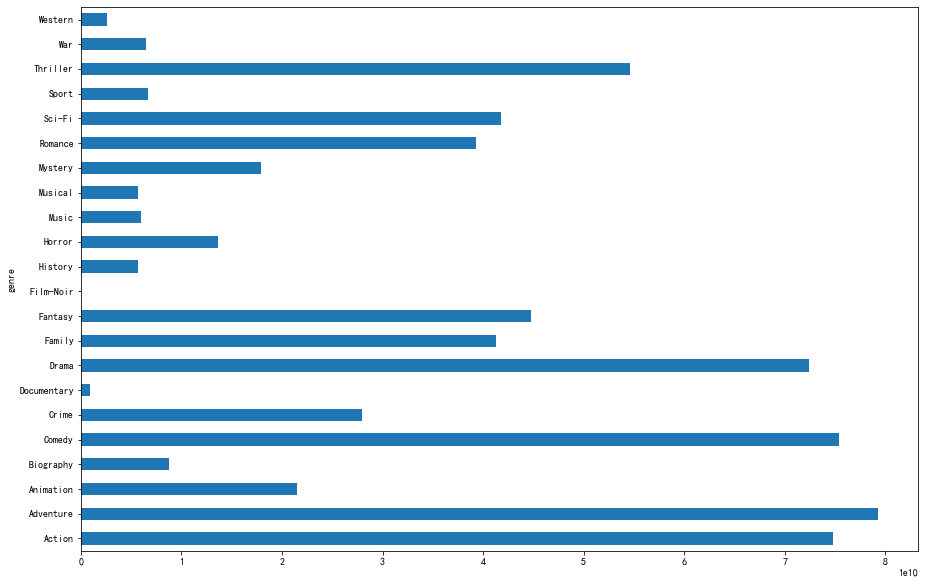

In [42]:
#按题材统计票房
genre_gross = genre_data.groupby('genre')['gross'].sum()
plt.figure(figsize=(15.0, 10.0))
genre_gross.plot(kind='barh')
plt.savefig('genre_gross.png')
plt.show()

3.盈利问题

In [47]:
# 计算电影盈利字段  
data['profit'] = data.gross - data.budget 
data

group_director_gross = data.groupby(by='director_name')['gross'].sum()/10000
group_director_gross.sort_values(ascending=False) 

group_director_profit = data.groupby(by='director_name')['profit'].sum()/10000
group_director_profit.sort_values(ascending=False) 

# print(type(group_director_profit)) 
# print(group_director_profit.values)
group_director_profit[group_director_profit.values>0] #盈利导演数量 
group_director_profit[group_director_profit.values<0] #亏本导演数量


C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


director_name
Abel Ferrara          -1127.2676
Adam Goldberg          -164.7420
Adam Rapp              -339.8772
Adam Rifkin           -1080.6975
Agnieszka Holland     -1064.7214
                         ...    
Yimou Zhang          -28321.4142
Zach Cregger           -145.7225
Zak Penn               -136.3170
Zal Batmanglij         -423.1704
Álex de la Iglesia     -999.6393
Name: profit, Length: 782, dtype: float64

4.评分

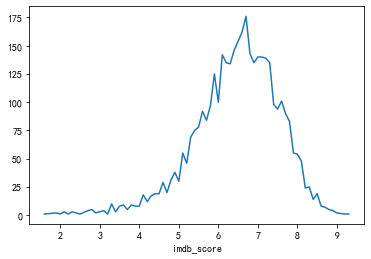

In [48]:
#查看各imdb评分的电影个数
imdb = data.groupby('imdb_score')['movie_title'].count()
plt.figure()
imdb.plot()
plt.savefig('imdb_scores.png')
plt.show()

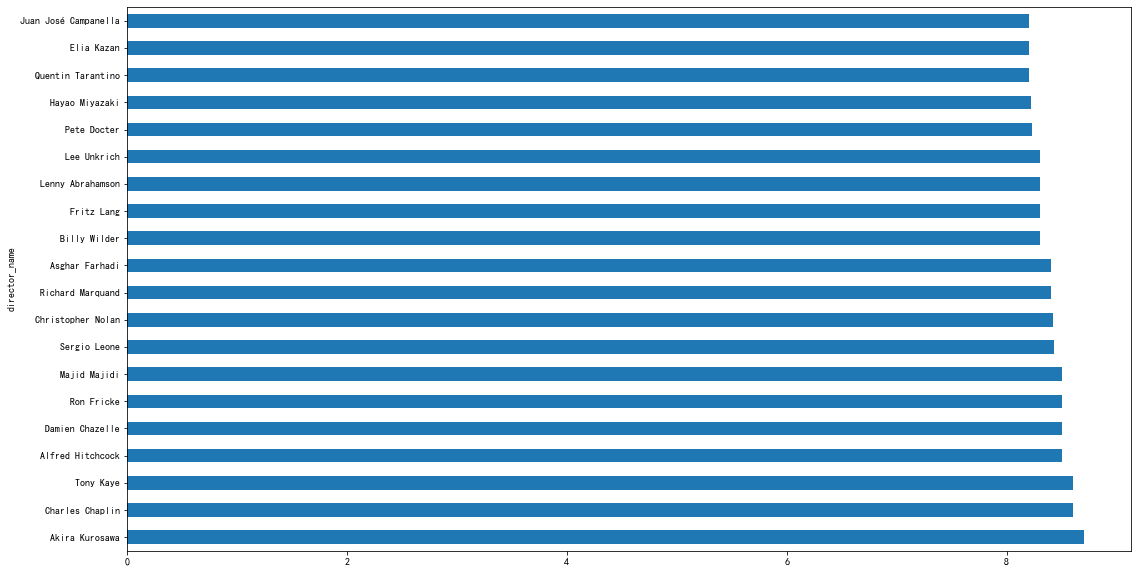

In [49]:
# 查看imdb平均分最高的前20导演
director_mean = data.groupby('director_name')['imdb_score'].mean()

# 使用sort排序，ascending=False代表降序
top20_imdb_directors = director_mean.sort_values(ascending=False)[:20]
plt.figure(figsize=(18.0, 10.0))
# kind='barh' 水平条形图
top20_imdb_directors.plot(kind='barh')
plt.savefig('top20_imdb_directors.png')
plt.show()

In [50]:
#导演vs票房总收入
group_director = data.groupby(by='director_name')['gross'].sum()
group_director.sort_values(ascending=False)

director_name
Steven Spielberg       4.114233e+09
Peter Jackson          2.592969e+09
Michael Bay            2.231243e+09
Tim Burton             2.071275e+09
Sam Raimi              2.049549e+09
                           ...     
Paul Bunnell           2.436000e+03
Alex Craig Mann        1.332000e+03
Ricki Stern            1.111000e+03
Frank Whaley           7.030000e+02
Ekachai Uekrongtham    1.620000e+02
Name: gross, Length: 1660, dtype: float64

In [51]:
#主演vs票房总收入
group_actor = data.groupby(by=['actor_1_name'])['gross'].sum()
group_actor.sort_values(ascending=False)

actor_1_name
Johnny Depp         3.714789e+09
Harrison Ford       3.391556e+09
Tom Hanks           3.264559e+09
Tom Cruise          2.987622e+09
J.K. Simmons        2.856407e+09
                        ...     
Jim Carter          3.607000e+03
Stephen McHattie    3.478000e+03
Tatyana Ali         2.468000e+03
Kate Maberly        2.436000e+03
Darryl Hunt         1.111000e+03
Name: gross, Length: 1431, dtype: float64

In [52]:
#导演+主演vs票房收入
group_actor = data.groupby(by=['director_name','actor_1_name'])['gross'].sum()
group_actor.sort_values(ascending=False) 

director_name          actor_1_name     
Joss Whedon            Chris Hemsworth      1.705551e+09
Sam Raimi              J.K. Simmons         1.485313e+09
Gore Verbinski         Johnny Depp          1.250323e+09
George Lucas           Natalie Portman      1.165483e+09
Tim Burton             Johnny Depp          1.070126e+09
                                                ...     
Alex Craig Mann        Justin Chon          1.332000e+03
Ricki Stern            Darryl Hunt          1.111000e+03
Brian Trenchard-Smith  David Keith          7.210000e+02
Frank Whaley           Lynn Cohen           7.030000e+02
Ekachai Uekrongtham    Michael Jai White    1.620000e+02
Name: gross, Length: 3419, dtype: float64

In [22]:
import numpy as np 
arr = np.array([[1,2,3],[4,5,6],[7,8,9]]) 
print(arr )
print("删除") 
arr = np.delete(arr,[1:2],axis=0) 
print(arr)

SyntaxError: invalid syntax (<ipython-input-22-36cd744d212f>, line 5)